### Problem statement : Customer clustering based on the profit and sales 
### Objective : Retail dataset of a global superstore for 4 years.

<img src="k-means-copy.jpg" height="400" width="400"/>

In [1]:
import pandas as pd
import numpy as np

In [2]:
base_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\superstore_dataset2011-2015.csv",encoding='latin1')

In [3]:
base_dataset.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
base_dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [5]:
base_dataset.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [6]:
base_dataset.shape

(51290, 24)

## Pre-processing 
### Step 1 : Memory_management

In [7]:
    df=base_dataset
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype

        if col_type in [int,float]:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("*******************************************************************************************")
    base_dataset=df

Memory usage of dataframe is 9.39 MB
Memory usage after optimization is: 8.02 MB
Decreased by 14.6%
*******************************************************************************************


In [8]:
df=base_dataset

In [9]:
## Following command will fetch only numberical columns

In [10]:
df=df[df.describe().columns]

In [11]:
df.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
0,42433,NaN,408.2500,2,0.000000,106.125000,35.468750
1,22253,NaN,120.3750,3,0.099976,36.031250,9.718750
2,48883,NaN,66.1250,4,0.000000,29.640625,8.171875
3,11731,NaN,44.8750,3,0.500000,-26.062500,4.820312
4,22255,NaN,113.6875,5,0.099976,37.781250,4.699219


In [12]:
## following command is used to add non-numerical columns to the dataframe df

In [13]:
df['Customer ID']=base_dataset['Customer ID']

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Customer ID
0,42433,NaN,408.2500,2,0.000000,106.125000,35.468750,TB-11280
1,22253,NaN,120.3750,3,0.099976,36.031250,9.718750,JH-15985
2,48883,NaN,66.1250,4,0.000000,29.640625,8.171875,AT-735
3,11731,NaN,44.8750,3,0.500000,-26.062500,4.820312,EM-14140
4,22255,NaN,113.6875,5,0.099976,37.781250,4.699219,JH-15985


In [15]:
master_dataset=df[['Customer ID','Sales','Quantity','Discount','Profit','Shipping Cost']]

In [16]:
master_dataset.head()

,Customer ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,TB-11280,408.2500,2,0.000000,106.125000,35.468750
1,JH-15985,120.3750,3,0.099976,36.031250,9.718750
2,AT-735,66.1250,4,0.000000,29.640625,8.171875
3,EM-14140,44.8750,3,0.500000,-26.062500,4.820312
4,JH-15985,113.6875,5,0.099976,37.781250,4.699219


In [17]:
master_dataset.shape

(51290, 6)

In [18]:
master_dataset['Customer ID'].nunique()

1590

In [19]:
## Following command will group the rows based on the Customer ID

In [20]:
master_dataset=master_dataset.groupby('Customer ID').sum()

In [21]:
master_dataset.shape

(1590, 5)

In [22]:
master_dataset.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
Customer ID,,,,,
AA-10315,13744.0,145,4.347656,447.75,1236.000
AA-10375,5884.0,139,7.000000,677.50,904.000
AA-10480,17696.0,150,2.982422,1516.00,1634.000
AA-10645,15344.0,267,9.195312,3052.00,1752.000
AA-315,2244.0,20,1.800781,536.00,215.875


In [23]:
master_dataset.reset_index(inplace=True)

In [24]:
master_dataset.head()

,Customer ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,AA-10315,13744.0,145,4.347656,447.75,1236.000
1,AA-10375,5884.0,139,7.000000,677.50,904.000
2,AA-10480,17696.0,150,2.982422,1516.00,1634.000
3,AA-10645,15344.0,267,9.195312,3052.00,1752.000
4,AA-315,2244.0,20,1.800781,536.00,215.875


## null value treatement
## Outlier treatement
## MinMaxScalar

In [25]:
def null_values(base_dataset):
    print(base_dataset.isna().sum())
    ## null value percentage     
    null_value_table=(base_dataset.isna().sum()/base_dataset.shape[0])*100
    ## null value percentage beyond threshold drop , else treat the columns 
    
    retained_columns=null_value_table[null_value_table<int(input())].index
    # if any variable as null value greater than input(like 30% of the data) value than those variable are consider as drop
    drop_columns=null_value_table[null_value_table>int(input())].index
    base_dataset.drop(drop_columns,axis=1,inplace=True)
    len(base_dataset.isna().sum().index)
    cont=base_dataset.describe().columns
    cat=[i for i in base_dataset.columns if i not in base_dataset.describe().columns]
    for i in cat:
        base_dataset[i].fillna(base_dataset[i].value_counts().index[0],inplace=True)
    for i in cont:
        base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.isna().sum())
    return base_dataset,cat,cont

In [26]:
null_values(master_dataset)

Customer ID      0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64
30
30
Customer ID      0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64


(     Customer ID         Sales  Quantity   Discount       Profit  \
 0       AA-10315  13744.000000       145   4.347656   447.750000   
 1       AA-10375   5884.000000       139   7.000000   677.500000   
 2       AA-10480  17696.000000       150   2.982422  1516.000000   
 3       AA-10645  15344.000000       267   9.195312  3052.000000   
 4         AA-315   2244.000000        20   1.800781   536.000000   
 5         AA-375    654.500000        30   1.900391    77.437500   
 6         AA-480   2064.000000        25   2.101562   554.500000   
 7         AA-645   1969.000000        35   7.703125  -608.500000   
 8       AB-10015  20032.000000       268   9.796875  3720.000000   
 9       AB-10060  18416.000000       232   6.957031  4516.000000   
 10      AB-10105  22976.000000       222  11.898438  6916.000000   
 11      AB-10150  13056.000000       180   5.300781  2064.000000   
 12      AB-10165  11648.000000       213   4.148438  2330.000000   
 13      AB-10255  10784.000000   

In [27]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y

In [28]:
outliers_transform(master_dataset)

In [29]:
master_dataset.isna().sum()

Customer ID      0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

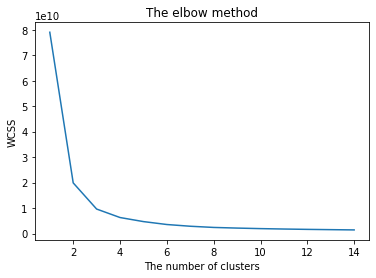

In [56]:
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.cluster import KMeans
x = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']])
    x.append(kmeans.inertia_)

plt.plot(range(1,15), x)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
x

[79019781832.9372,
 19878417496.060337,
 9612100477.330482,
 6280250044.408273,
 4686888331.765106,
 3534026690.77836,
 2860781519.085478,
 2392332333.520447,
 2137022609.63413,
 1922263346.3765001,
 1777785297.122097,
 1646696392.0777063,
 1516465999.3028836,
 1417137486.2786634]

In [50]:
len(x)

14

In [51]:
import sklearn as sklearn
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']])
km.predict(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']])

array([1, 4, 2, ..., 3, 0, 4])

In [53]:
from sklearn.cluster import AgglomerativeClustering
km=AgglomerativeClustering(n_clusters=5)
km.fit(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']])
km.labels_
#km.fit_predict(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']])

array([0, 2, 1, ..., 3, 2, 0], dtype=int64)

In [54]:
master_dataset['clusters']=km.labels_
master_dataset

,Customer ID,Sales,Quantity,Discount,Profit,Shipping Cost,clusters
0,AA-10315,13744.000000,145,4.347656,447.750000,1236.000000,0
1,AA-10375,5884.000000,139,7.000000,677.500000,904.000000,2
2,AA-10480,17696.000000,150,2.982422,1516.000000,1634.000000,1
3,AA-10645,15344.000000,267,9.195312,3052.000000,1752.000000,1
4,AA-315,2244.000000,20,1.800781,536.000000,215.875000,4
5,AA-375,654.500000,30,1.900391,77.437500,118.687500,4
6,AA-480,2064.000000,25,2.101562,554.500000,181.625000,4
7,AA-645,1969.000000,35,7.703125,-608.500000,209.000000,4
8,AB-10015,20032.000000,268,9.796875,3720.000000,2898.000000,1
9,AB-10060,18416.000000,232,6.957031,591.000000,2284.000000,1


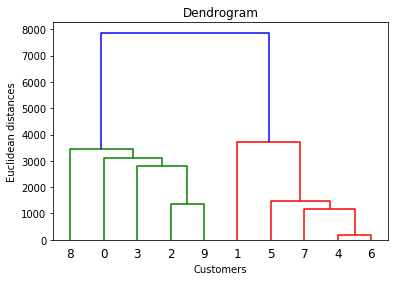

In [74]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(master_dataset[['Sales','Quantity','Discount','Profit','Shipping Cost']][0:10], method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### validations of clusters
### usecases